In [1]:
#Imorting libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.ticker as ticker

In [2]:
path = r'C:\Users\poury\12-2023 Instacart Basket Analysis'

In [4]:
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'ords_prods_customers.pkl'))

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'prepared data', 'orders_products_merged_derived_2.pkl'))

# Bar chart

<Axes: xlabel='orders_day_of_week'>

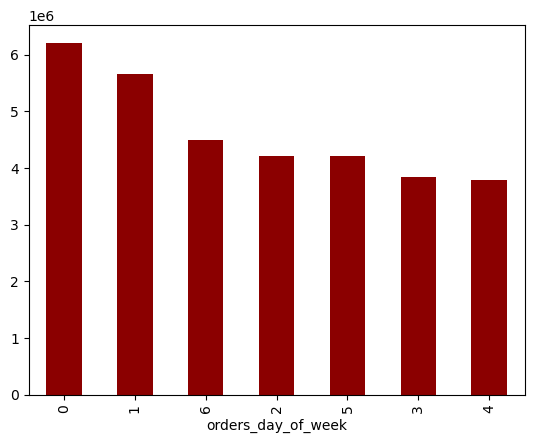

In [6]:
#Bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color='darkred')

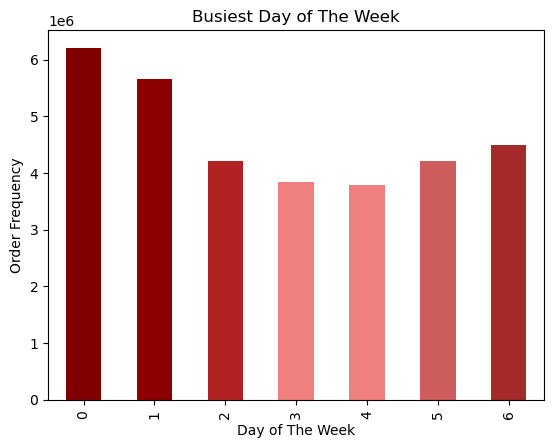

In [12]:
#With colors
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(title = 'Busiest Day of The Week', xlabel = 'Day of The Week', ylabel = 'Order Frequency',color=['maroon','darkred','firebrick','lightcoral','lightcoral','indianred','brown'])

In [13]:
#saving as png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

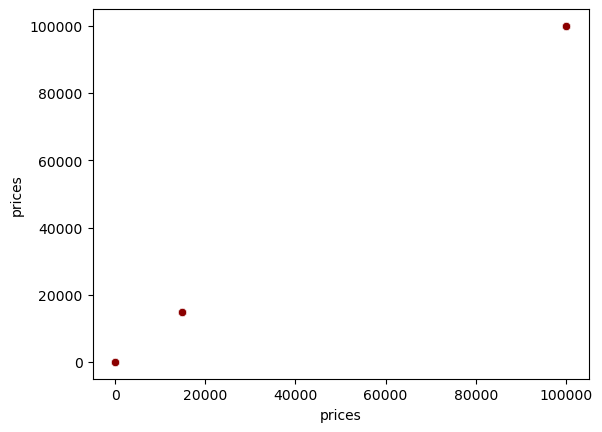

In [9]:
#scatterplot 
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge,color='darkred')

In [10]:
#Finding outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,Busiest_days,Busiest_priod_of_day,max_order,loyalty_flag,mean_spend,spending_flag,mean_DSPO,median_DSPO,median_order_freq,order_freq_flag
13128379,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,2,...,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,5.0,5.0,Frequent customer
13128380,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,6,...,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,5.0,5.0,Frequent customer
13128381,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,2,...,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,12.0,12.0,Regular customer
13128382,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,0,...,Busiest day,Average orders,4,New customer,1154.792308,High spender,12.0,12.0,12.0,Regular customer
13128383,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,1,...,Busiest day,Average orders,16,Regular customer,114.426619,High spender,23.0,23.0,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21815122,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,0,...,Busiest day,Average orders,39,Regular customer,1106.743956,High spender,4.0,4.0,4.0,Frequent customer
21815123,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,0,...,Busiest day,Most orders,39,Regular customer,1106.743956,High spender,4.0,4.0,4.0,Frequent customer
21815124,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,3,...,Least busy,Most orders,15,Regular customer,451.153540,High spender,5.0,5.0,5.0,Frequent customer
21815125,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,3,...,Least busy,Average orders,12,Regular customer,1178.381871,High spender,12.0,12.0,12.0,Regular customer


In [17]:
#Marking outliers as meissing values using numpy
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
#Checking maximum price after omiting outliers
ords_prods_merge['prices'].max()

25.0

In [37]:
ords_prods_merge['prices'].describe()

count   32429085.00
mean           7.80
std            4.24
min            1.00
25%            4.20
50%            7.40
75%           11.30
max           25.00
Name: prices, dtype: float64

In [41]:
# Calculate statistics
mean_price = 7.80
std_price = 4.24

# Define price range thresholds
lower_bound = mean_price - std_price
upper_bound = mean_price + std_price

# Categorize prices into three ranges
ords_prods_merge['price_range'] = pd.cut(ords_prods_merge['prices'], bins=[-float('inf'), lower_bound, upper_bound, float('inf')],
                           labels=['Low', 'Medium', 'High'], include_lowest=True)

# Display the updated DataFrame
print(ords_prods_merge)

          product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                  1  Chocolate Sandwich Cookies        61             19   
3                  1  Chocolate Sandwich Cookies        61             19   
4                  1  Chocolate Sandwich Cookies        61             19   
...              ...                         ...       ...            ...   
32434207       49688      Fresh Foaming Cleanser        73             11   
32434208       49688      Fresh Foaming Cleanser        73             11   
32434209       49688      Fresh Foaming Cleanser        73             11   
32434210       49688      Fresh Foaming Cleanser        73             11   
32434211       49688      Fresh Foaming Cleanser        73             11   

          prices  order_id  user_id eval_set  order_number  \
0           5

In [42]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,Busiest_days,Busiest_priod_of_day,max_order,loyalty_flag,mean_spend,spending_flag,mean_DSPO,median_DSPO,median_order_freq,order_freq_flag
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,prior,28,6,...,Regularly busy,Most orders,32,Regular customer,6.94,Low spender,8.00,8.00,8.00,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,prior,30,6,...,Regularly busy,Average orders,32,Regular customer,6.94,Low spender,8.00,8.00,8.00,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.80,389851,709,prior,2,0,...,Busiest day,Average orders,5,New customer,7.93,Low spender,8.00,8.00,8.00,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.80,652770,764,prior,1,3,...,Least busy,Most orders,3,New customer,4.97,Low spender,9.00,9.00,9.00,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.80,1813452,764,prior,3,4,...,Least busy,Average orders,3,New customer,4.97,Low spender,9.00,9.00,9.00,Frequent customer


(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Low')])

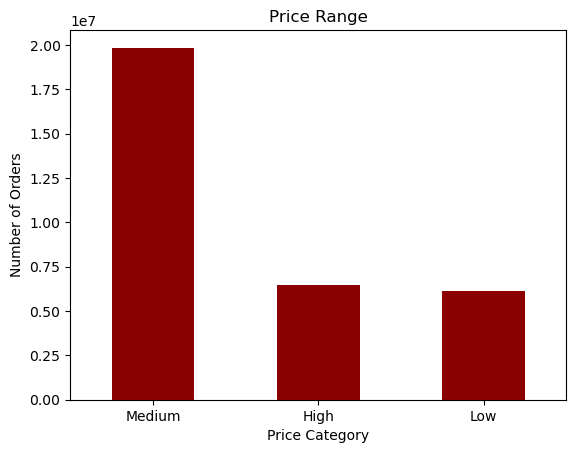

In [46]:
bar_price_range = ords_prods_merge['price_range'].value_counts(dropna = True).plot.bar(title = 'Price Range', xlabel = 'Price Category', ylabel = 'Number of Orders', color = 'darkred')
plt.xticks(rotation=0)

In [47]:
#saving as png
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

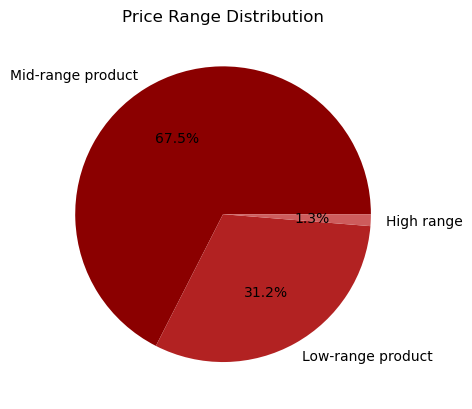

In [12]:
price_range_counts = ords_prods_merge['price_range'].value_counts(dropna=True)

# Plotting pie chart
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', colors=['darkred', 'firebrick', 'indianred', 'firebrick'])

# Adding title
plt.title('Price Range Distribution')

path = r'C:\Users\poury\12-2023 Instacart Basket Analysis'
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range.png'))

# Display the pie chart
plt.show()


# Histogram

<Axes: ylabel='Frequency'>

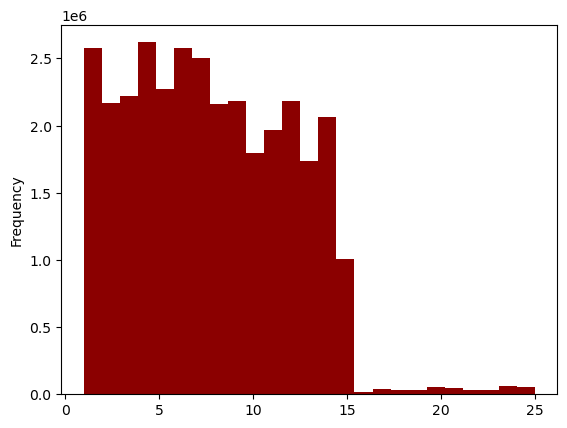

In [19]:
#Histogram with bin=25
ords_prods_merge['prices'].plot.hist(bins = 25,color='darkred')

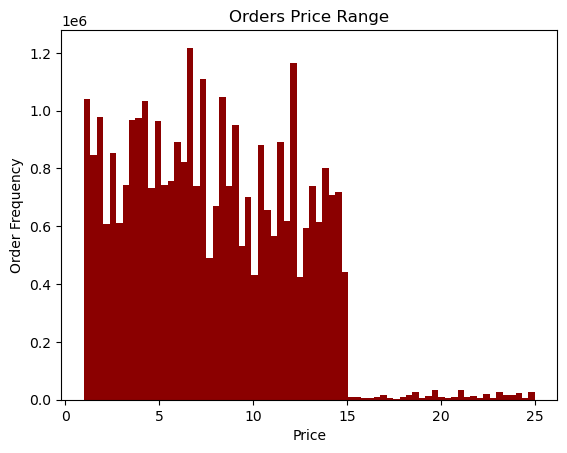

In [21]:
#Bins = 70 
his=ords_prods_merge['prices'].plot.hist(bins = 70,title = 'Orders Price Range', xlabel = 'Price', ylabel = 'Order Frequency',color='darkred')

In [22]:
#saving as png
his.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'his_prices.png'))

# Sampling Data

In [23]:
#Creating a true or false list to the test np.random.rant <=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
#Store 70% of the sample in dataframe big
big = ords_prods_merge[dev]

In [25]:
#Store 30% of the sample in dataframe small
small = ords_prods_merge[~dev]

In [19]:
len(ords_prods_merge)

32434212

In [20]:
len(big) + len(small)

32434212

In [26]:
df_2 = small[['orders_day_of_week','prices']]

# Creating line chart

E:\Users\poury\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\poury\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


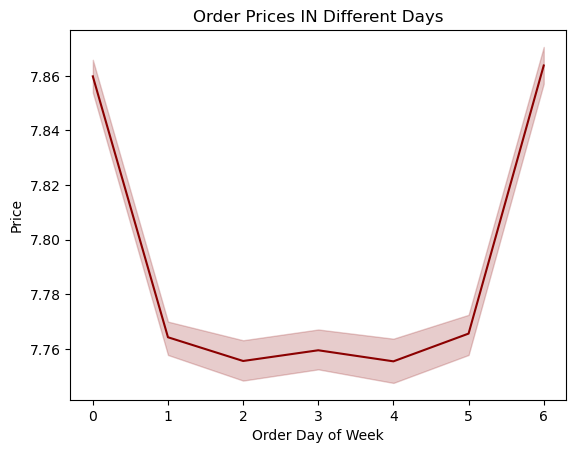

In [30]:
#Line chart
# Line chart using seaborn
line = sns.lineplot(data=df_2, x='orders_day_of_week', y='prices', color='darkred')
# Set title and labels
plt.title('Order Prices IN Different Days')
plt.xlabel('Order Day of Week')
plt.ylabel('Price')
# Display the plot
plt.show()

In [31]:
#saving as png
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders-day.png'))

# 3.Histogram Of “order_hour_of_day” 

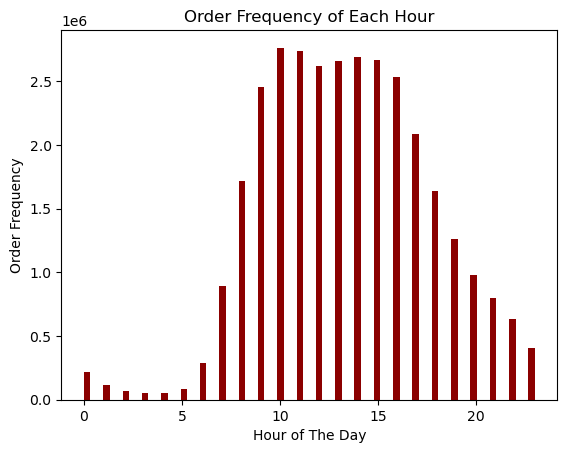

In [9]:
#Histogram of “order_hour_of_day”
his_order_hour_of_day=ords_prods_merge['order_hour_of_day'].plot.hist(bins = 70,title = 'Order Frequency of Each Hour', xlabel = 'Hour of The Day', ylabel = 'Order Frequency',color='darkred')

In [14]:
#saving as png
his_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'his_order_hour_of_day.png'))

In [26]:
df_hour =ords_prods_customers[['order_hour_of_day']]

In [27]:
df_hour['order_hour_of_day'].value_counts()

order_hour_of_day
10    2764390
11    2738585
14    2691563
15    2664522
13    2663272
12    2620800
16    2537469
9     2456661
17    2089452
8     1719952
18    1637922
19    1259382
20     977017
7      891928
21     796362
22     634737
23     402612
6      290770
0      218942
1      115786
5       88057
2       69431
4       53283
3       51317
Name: count, dtype: int64

Observations:

 Peak hours for order is between 9a.m - 4p.m with most orders at 10, 11, 14.From 12a.m-5a.m we have the least orders.

# Create a bar chart from the “loyalty_flag” column.

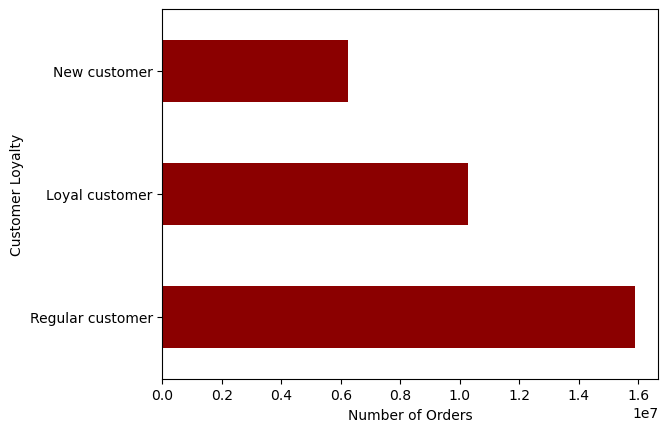

In [29]:
#Loyalty flag bar
bar_loyal = ords_prods_customers['loyalty_flag'].value_counts().plot.barh(ylabel="Customer Loyalty", xlabel="Number of Orders",color='darkred')


In [32]:
#saving as png
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty.png'))

In [30]:
ords_prods_customers['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: count, dtype: int64

In [31]:
total_customers = 15891077 + 10293737 + 6249398

regular_percentage = (15891077 / total_customers) * 100
loyal_percentage = (10293737 / total_customers) * 100
new_percentage = (6249398 / total_customers) * 100

print(f"Regular Customer: {regular_percentage:.2f}%")
print(f"Loyal Customer: {loyal_percentage:.2f}%")
print(f"New Customer: {new_percentage:.2f}%")

Regular Customer: 48.99%
Loyal Customer: 31.74%
New Customer: 19.27%


#Observations:

while our loyal customers made 31.74% of the orders , our regular customers have the most share of total orders with around 49% and the new customers had a share of 19.27 percent .

# Difference in expenditure  depending on the hour of the day

In [33]:
#Checking using sample
df_small_expenditure = small[['order_hour_of_day', 'prices']]

In [34]:
df_small_expenditure.head()

,order_hour_of_day,prices
0,11,5.80
2,21,5.80
3,13,5.80
6,14,5.80
10,11,5.80


E:\Users\poury\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\poury\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


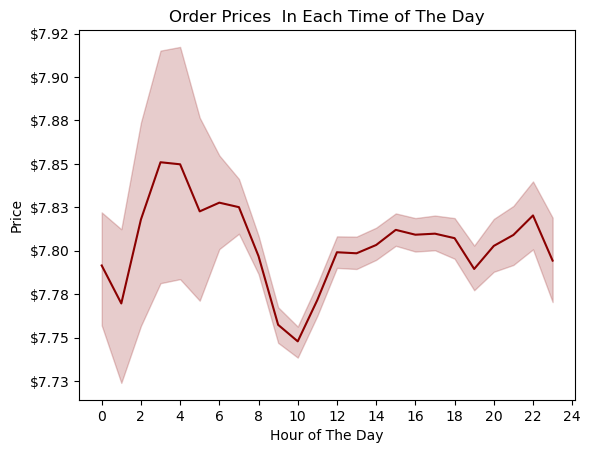

In [48]:
#Line chart of expenditure depending on the hour of the day 
line_small_expenditure = sns.lineplot(data=df_small_expenditure, x='order_hour_of_day', y='prices', color='darkred')
line_small_expenditure.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:.2f}'))
plt.title('Order Prices  In Each Time of The Day')
plt.xlabel('Hour of The Day')
plt.ylabel('Price')
#set x axis to show each hour
# Set x-axis ticks to show every 2 hour
line_small_expenditure.xaxis.set_major_locator(ticker.MultipleLocator(base=2))

In [49]:
line_small_expenditure.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_expenditure_hour.png'))

Observations:

The prices are at top around 3a.m and at 10a.m the lowest.

#  Exploratory analysis of customer demographics

In [46]:
# Extract age-depenandants into a dataframe
df_age_dependants = ords_prods_customers[['age','n_dependants']]

In [47]:
df_age_dependants.head()

,age,n_dependants
0,81,1
1,81,1
2,81,1
3,81,1
4,81,1


E:\Users\poury\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\poury\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


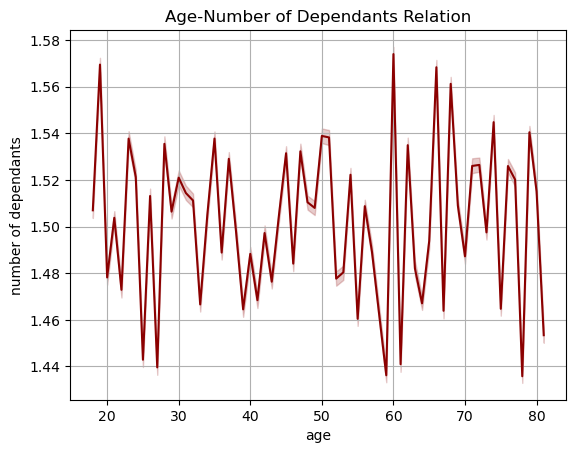

In [48]:
# create a line graph to see the possible correlation
line_age_dependants = sns.lineplot(data=df_age_dependants, x='age', y='n_dependants',color='darkred')
line_age_dependants.set(xlabel='age', ylabel='number of dependants')
plt.title('Age-Number of Dependants Relation')
plt.grid()

In [49]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_age_dependants.png'))

Observations:

We can not distinguish any meaningful relation between age and the number of dependencies.

# Family status of the customers

In [51]:
#Finding the customers distribution amoung different groups
df_fam_status = ords_prods_customers[['fam_status','user_id']]

In [54]:
#Grouping by family status
df_user_family_group = df_fam_status.groupby(['fam_status'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\poury\AppData\Local\Temp\ipykernel_3116\2983318737.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_user_family_group = df_fam_status.groupby(['fam_status'], as_index=False).agg({'user_id': 'nunique'})


E:\Users\poury\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Customers Distribution by Family Status')

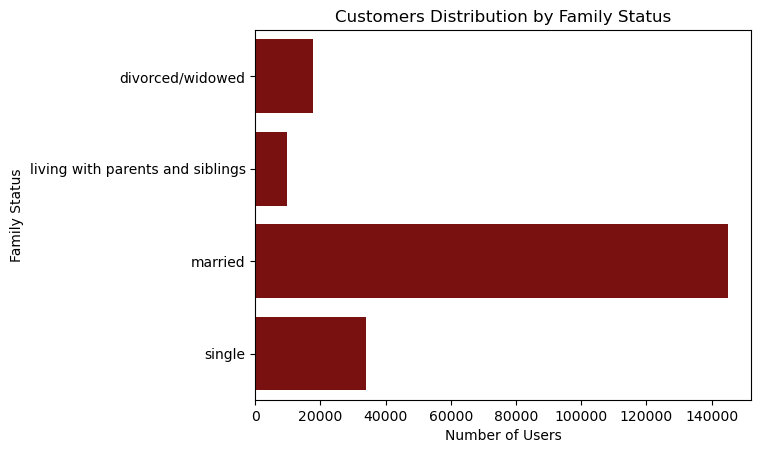

In [58]:
#Visualizing using bar chart
color_dict = {'married': 'darkred', 'single': 'firebrick', 'divorced/widowed': 'indianred', 'living with parents and siblings': 'lightcoral'}
bar_fam_users = sns.barplot(y='fam_status', x='user_id', data=df_user_family_group, color='darkred')
bar_fam_users.set(ylabel='Family Status', xlabel='Number of Users')
plt.title('Customers Distribution by Family Status')

In [59]:
color_dict = {'married': 'darkred', 'single': 'firebrick', 'divorced/widowed': 'indianred', 'living with parents and siblings': 'lightcoral'}

In [62]:
bar_fam_users.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_fam-stats.png'))

Observations:
The number of married users alone is greater than all other groups together.

#  connection between age and spending power (income)

In [60]:
#Finding the customers distribution amoung different groups
df_age_income = ords_prods_customers[['age','income']]

[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

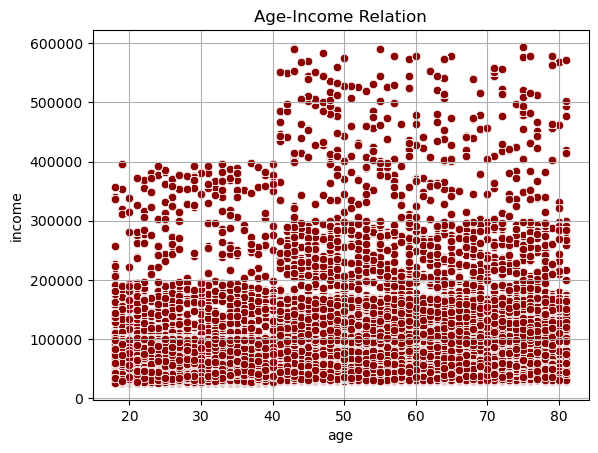

In [63]:
# Create a scatterplot to see the correlation between age and income
scatter_age_income = sns.scatterplot(x='age', y='income', data=df_age_income,color='darkred')
plt.grid()
plt.title('Age-Income Relation')
scatter_age_income.set(xlabel='age', ylabel='income')

In [64]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/scatter_age_income.png'))

Observations:

The age group 18-40 have has less spending spending power compare to elder people in the group.  

We could see that the scatter plot shows less density in the more than 200k-400k income and no density above 400k among the younger group.

In [ ]:
df